-- **clean_text.csv was generated after cleaning and proc labeled_data.csv, it doesn't include augmented text

**Now that the data is clean, let’s visualize and understand the nature of our data. A few obvious things we can look at are as follows:**

- Number of words in each tweet
- Average length of word in a tweet
- Wordcloud

### Importing Libraries

In [1]:
import pandas as pd
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark-palette')
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(15,10),'axes.grid' : False})
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
#load data
df=pd.read_csv('clean_data.csv')

In [3]:
df.sample(10)

,class,tweet,clean
2808,2,@Cee_Murda94 no it's yellow fin. It's in edgew...,yellow fin
3609,1,@JaredReve use monkey maker you prick!,monkey maker prick
8125,1,Bobby stole the black from Gabby. Pedro: But s...,bobby steal black gabby pedro keep ghetto
7833,2,Ask the governor how we are supposed to pay fo...,ask governor suppose pay typical mentality gov...
2235,1,2+2 not knowing wtf it is bitch,fuck bitch
1237,1,&#8220;@DuncanHines_: @KB_Three fck you nigger...,fuck nigger loud kid bra
4225,1,@NYRKelsMads \nDat dawg live betta den most co...,dawg live betta den color folk hood
21203,1,Stupid bitches. Fucking skanks. Dumb hoes.,stupid bitch fuck skank dumb hoe
19489,1,RT @lamLilDurk: Black girls hoes cause they fu...,black hoe fuck nigga revenge dumb shit
20377,1,RT @xleaaahh: &#8220;@1stBlocJeremiah: I want ...,subway cooky dem bitch sound


In [4]:
df.dtypes

class     int64
tweet    object
clean    object
dtype: object

In [5]:
df['clean']=df['clean'].astype(str)

### 1. Number of words in each tweet

In [6]:
df['number_of_words']=df['clean'].progress_apply(lambda x: len(x.split(" ")))

100%|████████████████████████████████████████████████████████████████████████| 24783/24783 [00:00<00:00, 329311.28it/s]


<AxesSubplot:xlabel='number_of_words', ylabel='count'>

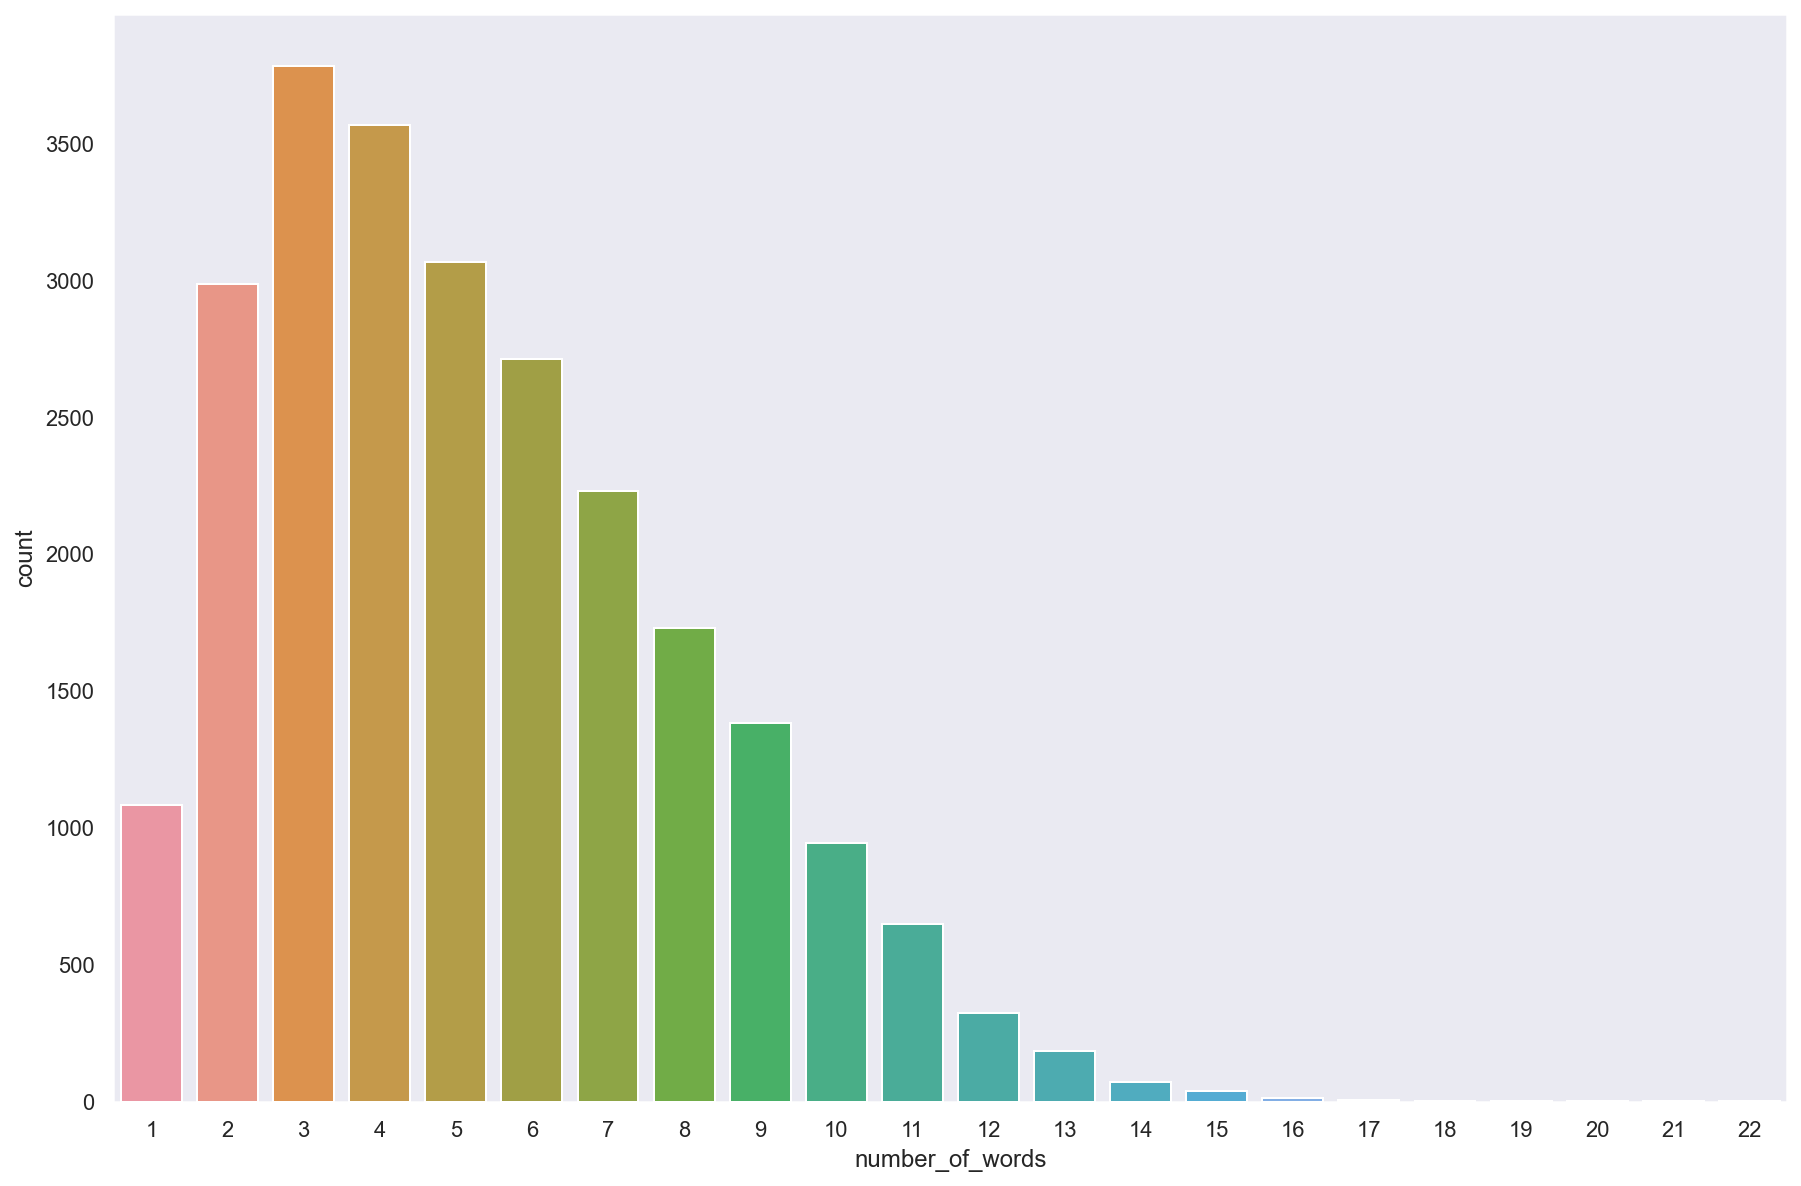

In [7]:

sns.countplot('number_of_words',data=df)

**It appears that the number of meaningful words in each tweet on an average is less than 16 words.**

### Average length of words used

In [8]:
df['avg_len_of_words']=df['clean'].progress_apply(lambda x: [len(word) for word in x.split()]).progress_apply(lambda y: round(np.mean(y)))

100%|█████████████████████████████████████████████████████████████████████████| 24783/24783 [00:00<00:00, 25045.73it/s]


In [9]:
df.head()

,class,tweet,clean,number_of_words,avg_len_of_words
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,complain clean house always trash,5,6
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dat cold toga coffin hoe est place,7,4
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confuse shit,8,4
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,tranny,1,6
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch,7,5


<AxesSubplot:xlabel='avg_len_of_words', ylabel='count'>

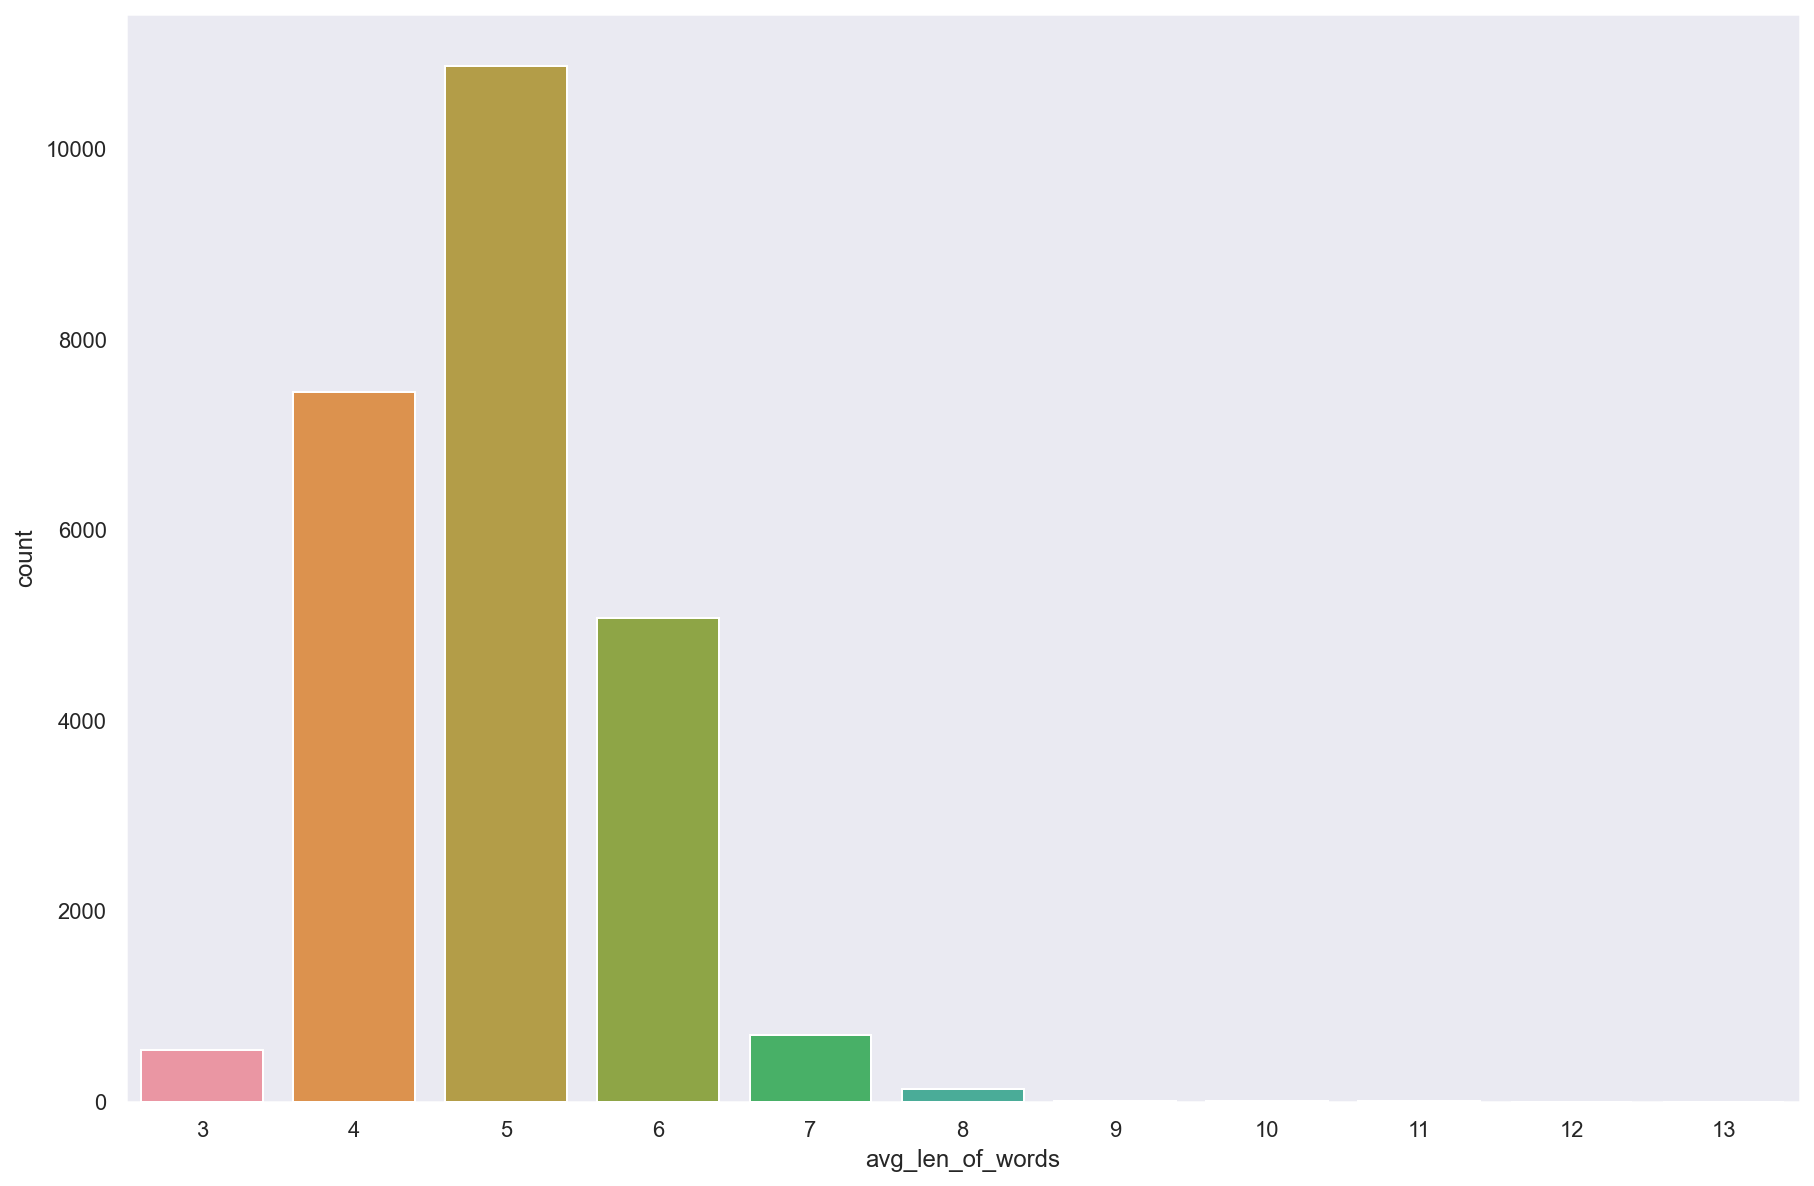

In [10]:
sns.countplot('avg_len_of_words',data=df)

**People usually write short words to express their feelings at twitter. Typically words having 4 to 6 alphabets**

## Word Cloud

In [11]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [12]:
hate_wc = wc.generate(df[df['class'] == 0]['clean'].str.cat(sep=" "))

#### Hate Speech Cloud

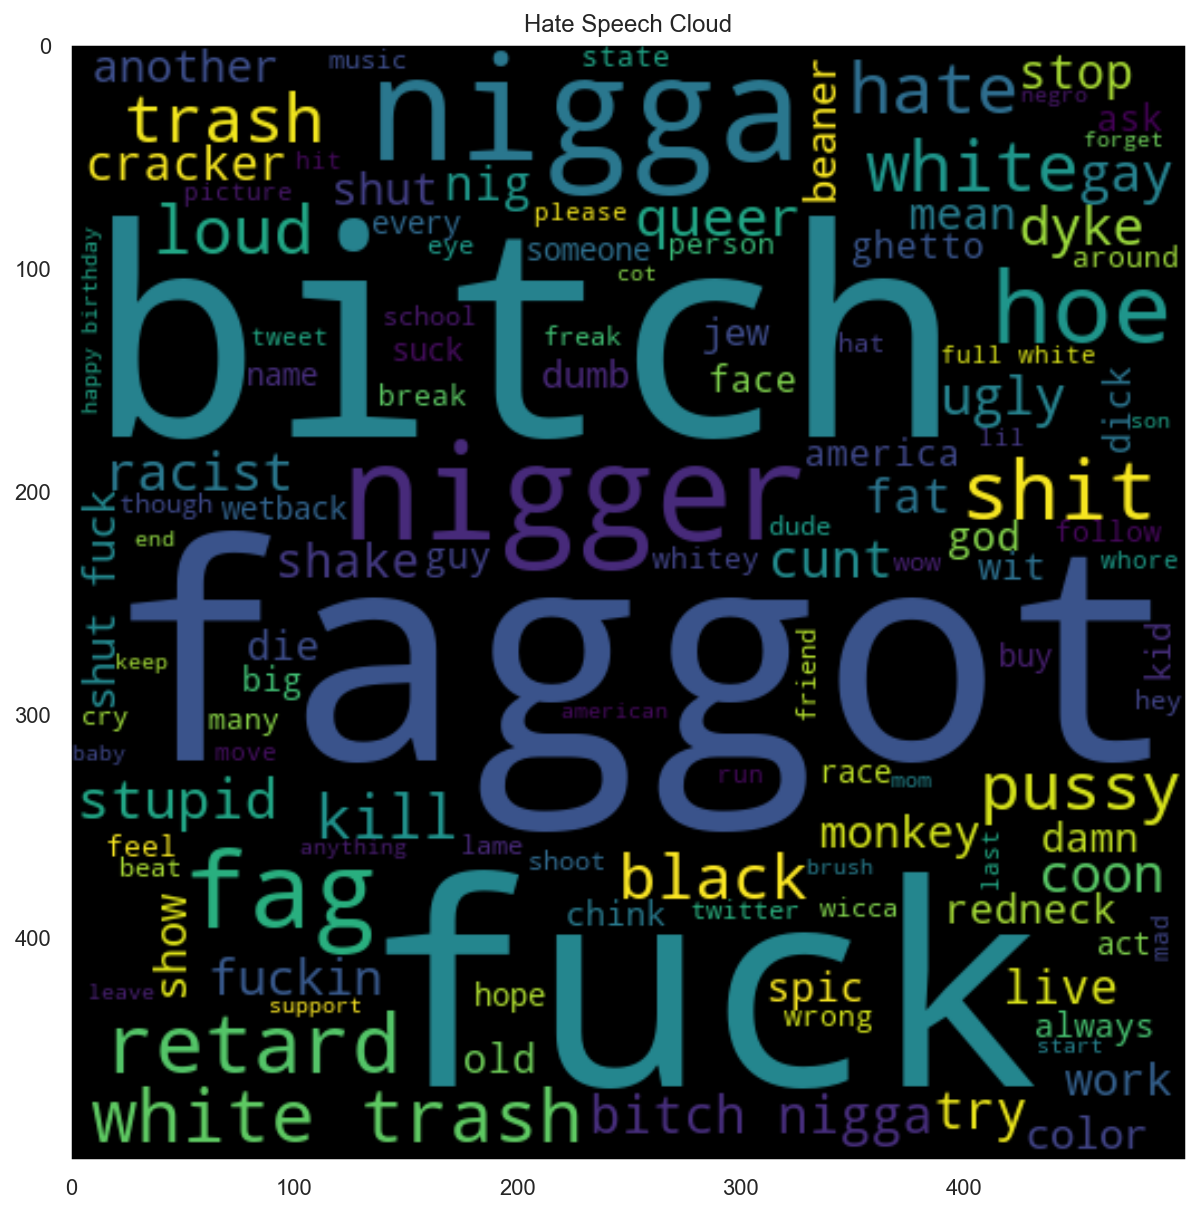

In [13]:
plt.figure(figsize=(10,12))
plt.title('Hate Speech Cloud')
plt.imshow(hate_wc,interpolation='bilinear')

In [14]:
hate_wc.to_file('hate.png')

### Offensive Speech Cloud

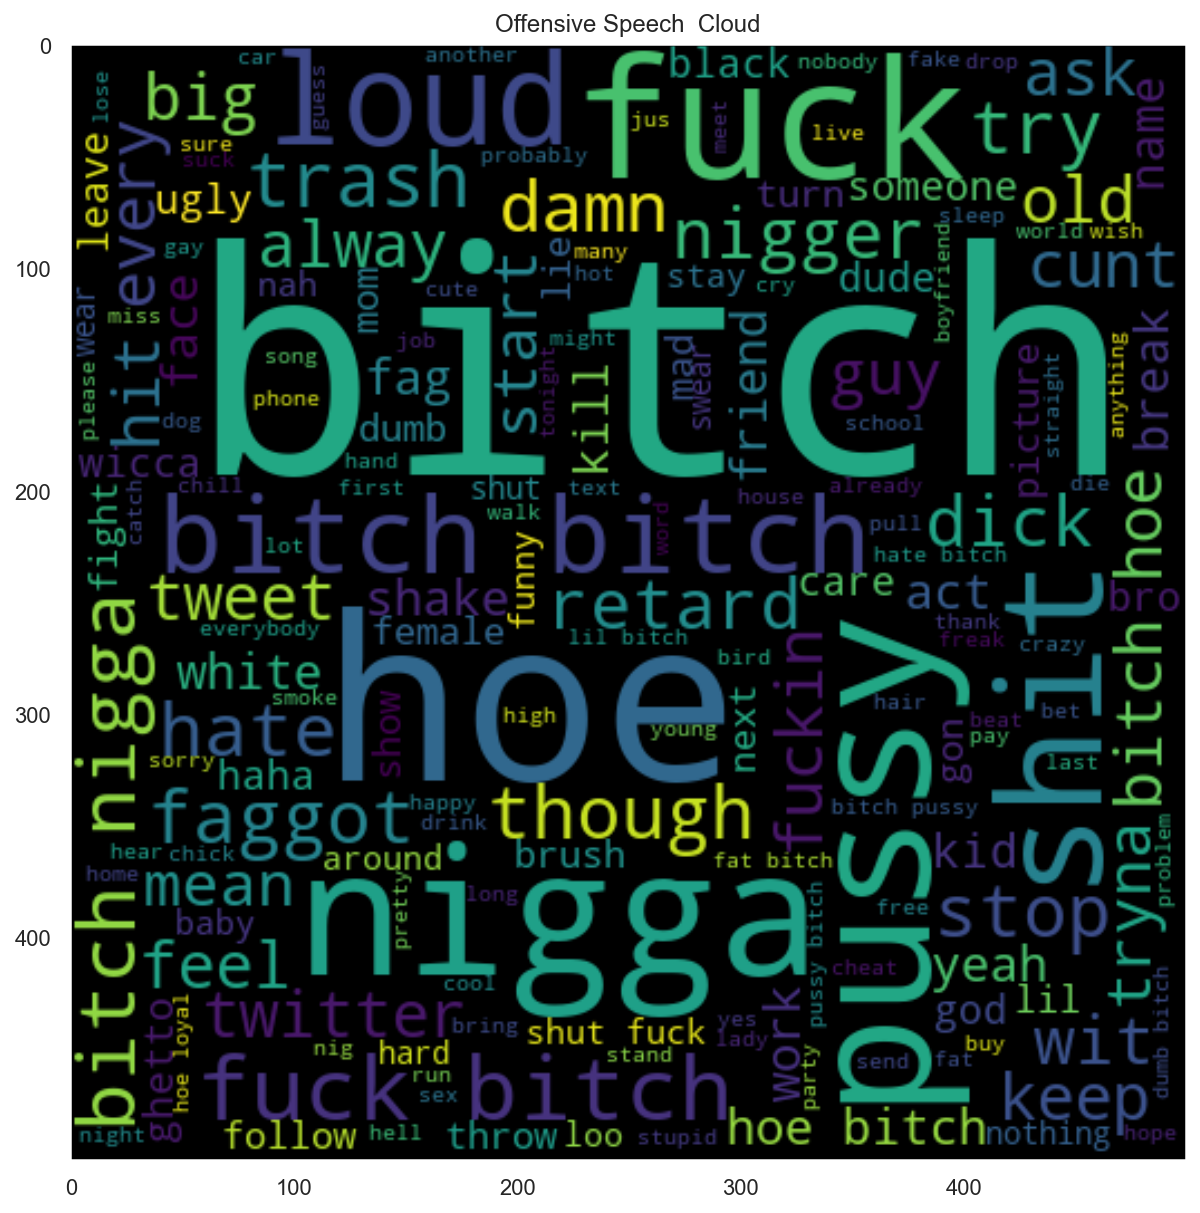

In [15]:
offensive_wc = wc.generate(df[df['class'] == 1]['clean'].str.cat(sep=" "))

plt.figure(figsize=(10,12))
plt.title('Offensive Speech  Cloud')
plt.imshow(offensive_wc,  interpolation="bilinear")

In [16]:
offensive_wc.to_file('offensive.png')

#### Neither

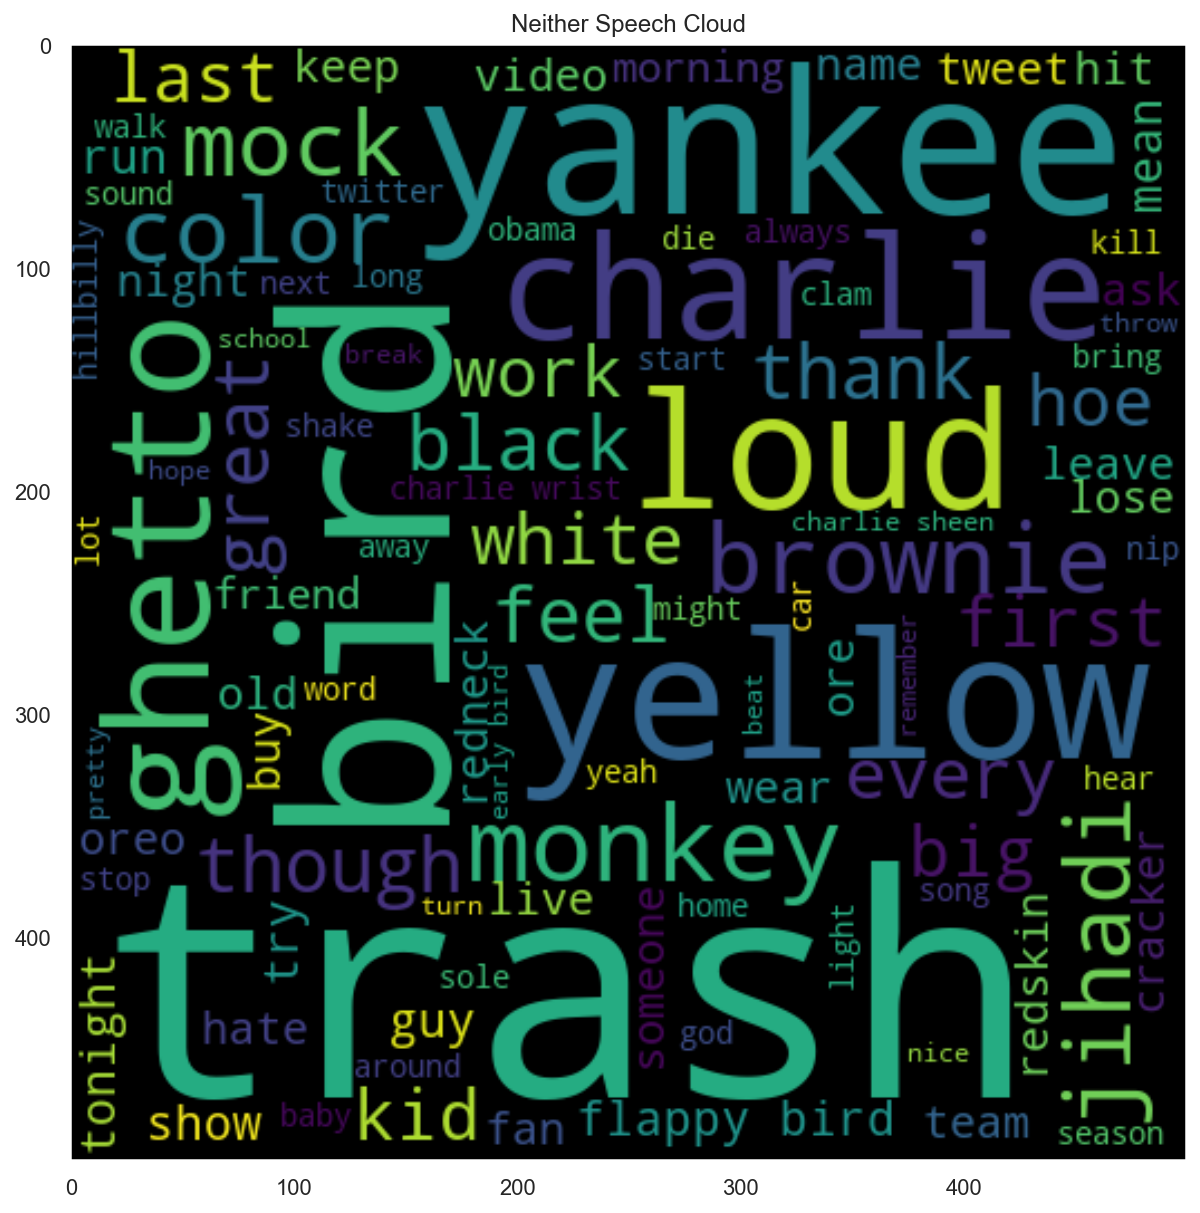

In [17]:
neither_wc = wc.generate(df[df['class'] == 2]['clean'].str.cat(sep=" "))

plt.figure(figsize=(10,12))
plt.title('Neither Speech Cloud')
plt.imshow(neither_wc,  interpolation="bilinear")

In [18]:
neither_wc.to_file('neither.png')

## Hate Speech Corpus

In [19]:
hate_corpus = []
for msg in df[df['class'] == 0]['clean']:
    for word in msg.split():
        hate_corpus.append(word)

In [20]:
print("Hate speech consists of" + " " +str(len(hate_corpus)) + " words")

Hate speech consists of 7944 words


### Most common 30 hate speech words

In [21]:
from collections import Counter

In [22]:
word_counts=[x[1] for x in Counter(hate_corpus).most_common(30)]
words=[x[0] for x in Counter(hate_corpus).most_common(30)]

Text(0, 0.5, 'Words')

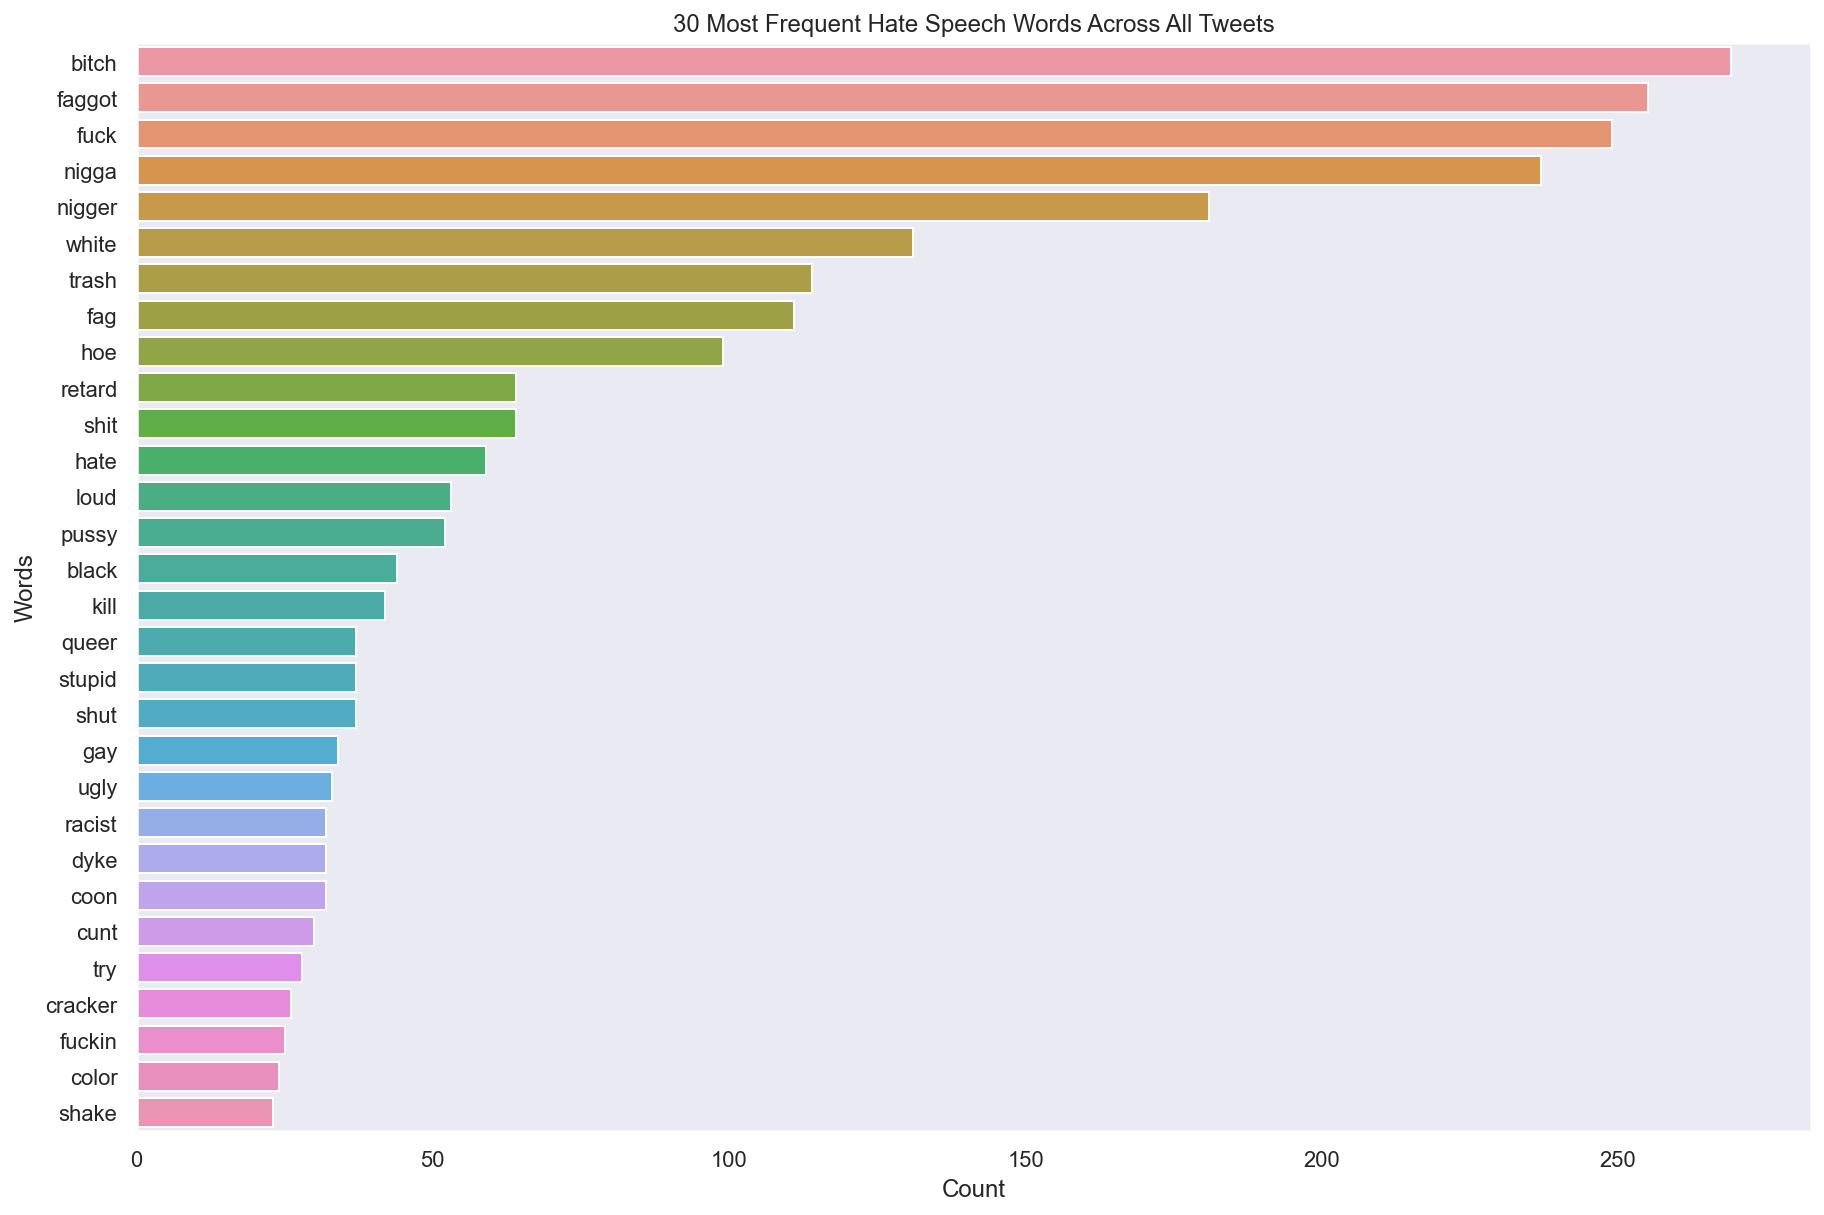

In [23]:
sns.barplot(x=word_counts, y=words)
plt.title('30 Most Frequent Hate Speech Words Across All Tweets')
plt.xlabel("Count")
plt.ylabel('Words')

## Offensive Speech Corpus

In [24]:
offensive_corpus = []
for msg in df[df['class'] == 1]['clean']:
    for word in msg.split():
        offensive_corpus.append(word)

print("Offensive speech consists of" + " " +str(len(offensive_corpus)) + " words")

Offensive speech consists of 97756 words


### Most common 30 offensive speech words


Text(0, 0.5, 'Words')

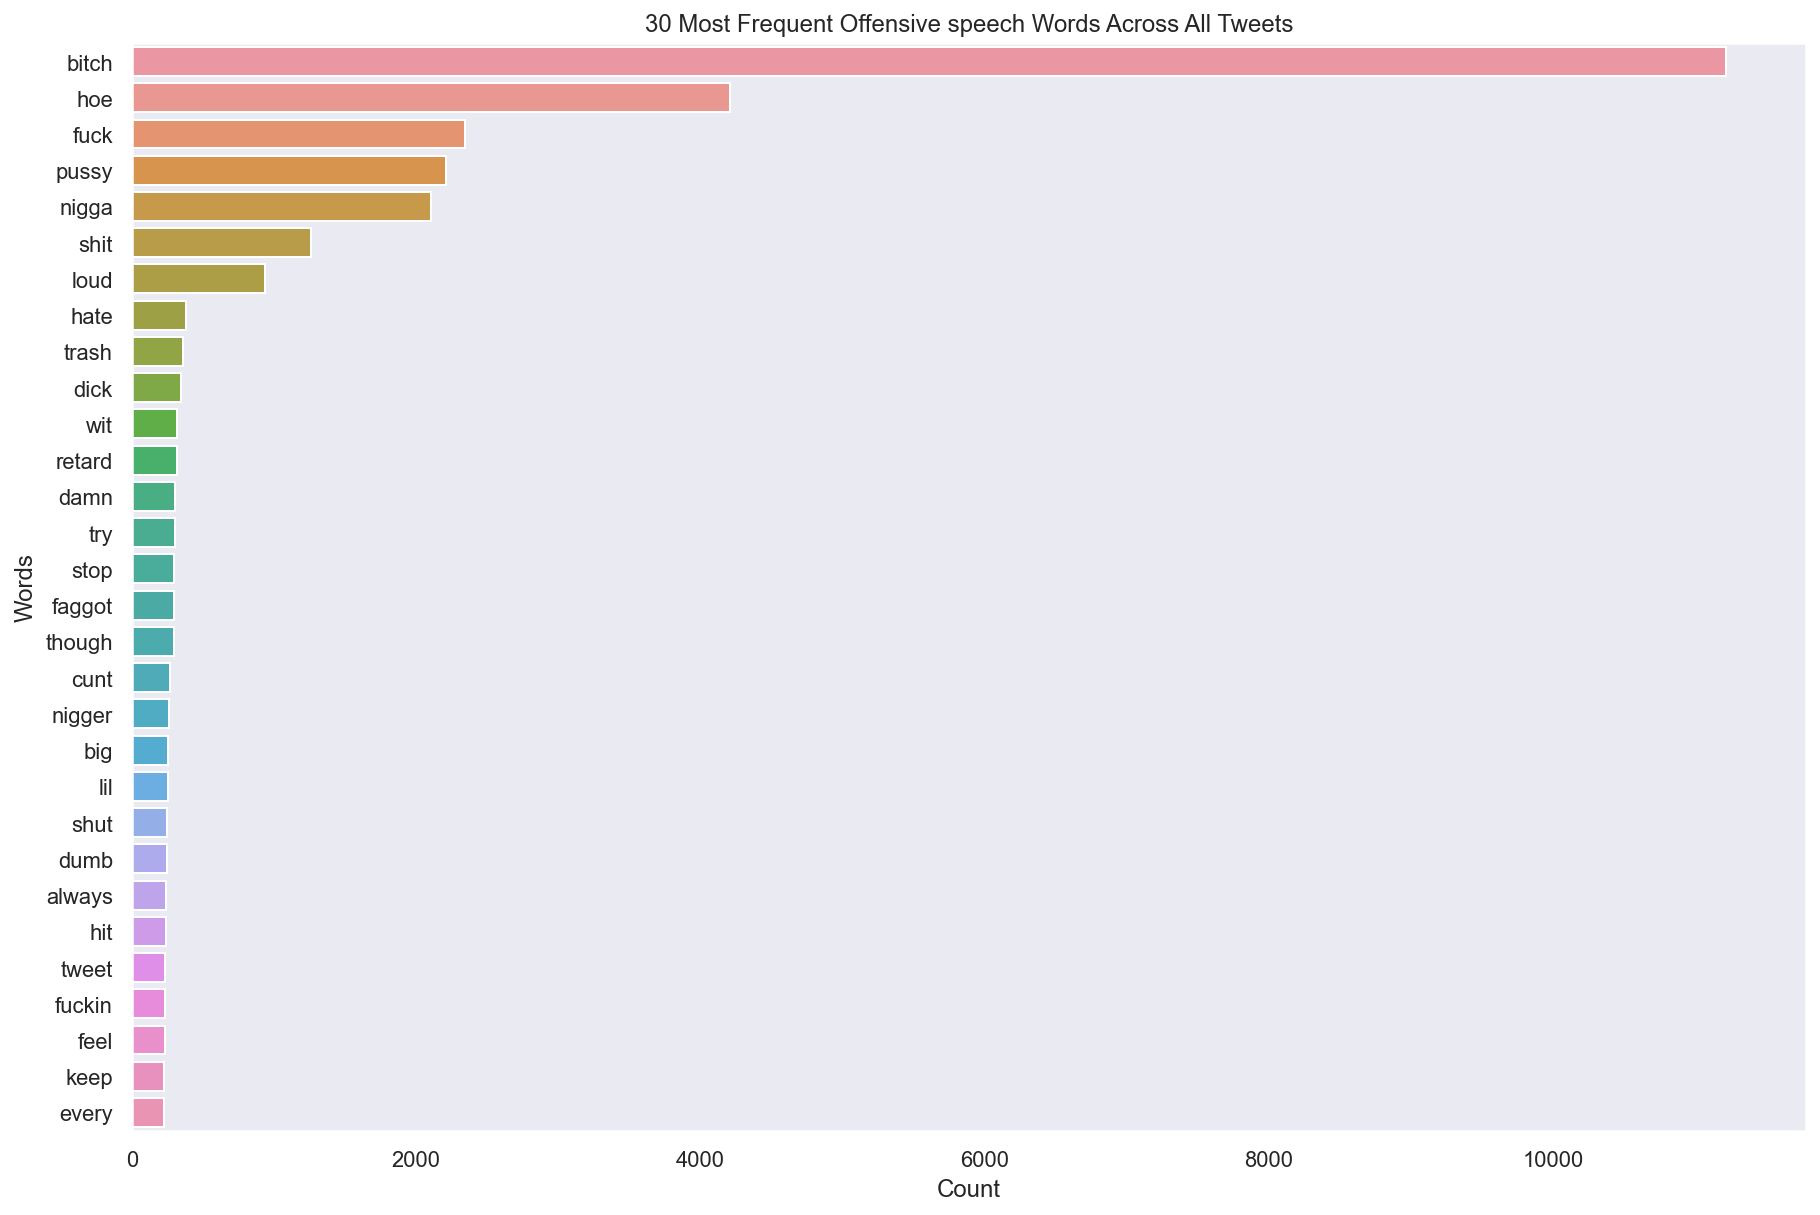

In [25]:
word_counts=[x[1] for x in Counter(offensive_corpus).most_common(30)]
words=[x[0] for x in Counter(offensive_corpus).most_common(30)]
sns.barplot(x=word_counts, y=words)

plt.title('30 Most Frequent Offensive speech Words Across All Tweets')
plt.xlabel("Count")
plt.ylabel('Words')

## Neither Hate nor Offensive Speech Corpus

In [26]:
neither_corpus = []
for msg in df[df['class'] == 2]['clean']:
    for word in msg.split():
        neither_corpus.append(word)

print("Neither Hate nor Offensive speech consists of" + " " +str(len(neither_corpus)) + " words")

Neither Hate nor Offensive speech consists of 25360 words


Text(0, 0.5, 'Words')

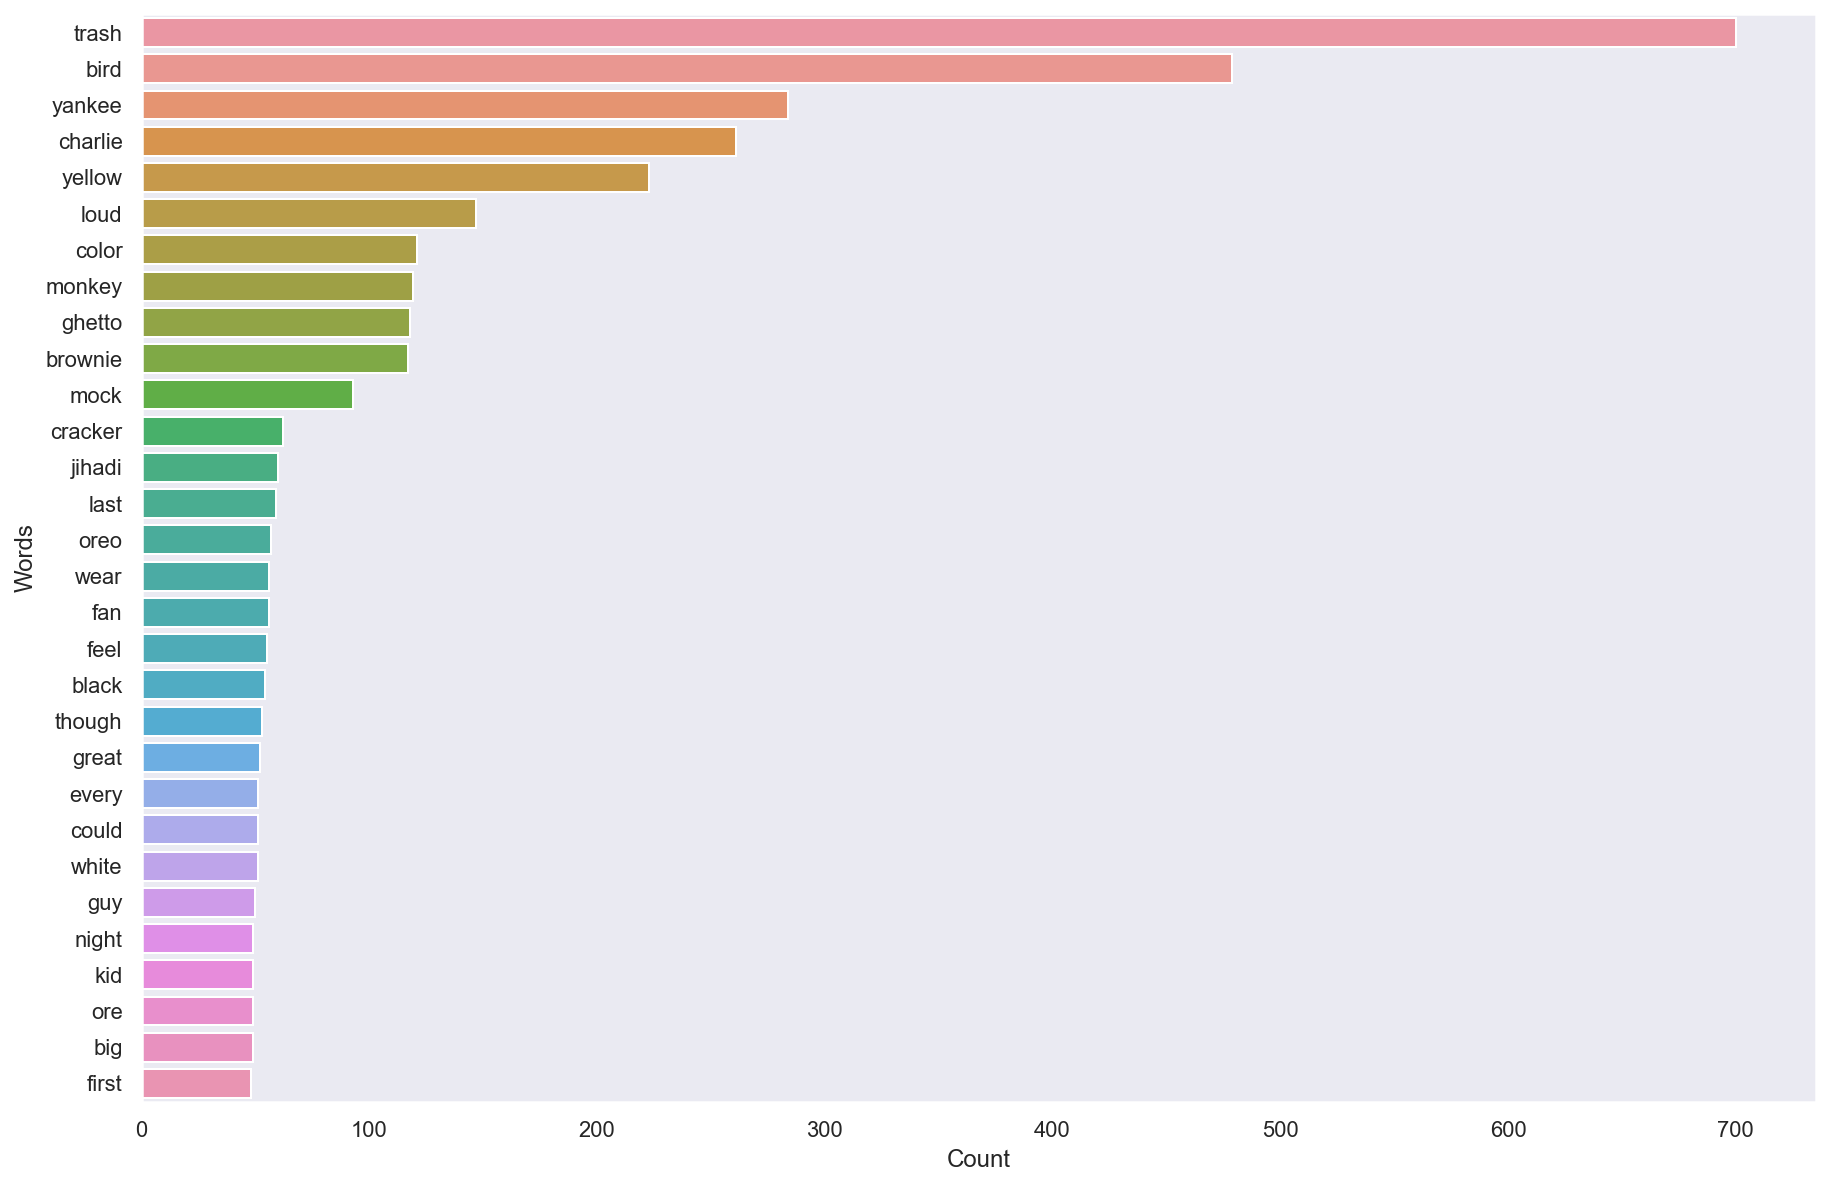

In [27]:
word_counts=[x[1] for x in Counter(neither_corpus).most_common(30)]
words=[x[0] for x in Counter(neither_corpus).most_common(30)]
sns.barplot(x=word_counts, y=words)

plt.xlabel("Count")
plt.ylabel('Words')